In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit # we're importing just this one function from scipy.optimize
from scipy.interpolate import UnivariateSpline

1456556.0
[   5.7421875     6.22070312    6.69921875 ...,  963.25195312  963.73046875
  964.20898438]
[ 0.69314718  4.18965474  6.63331843 ...,  6.7129562   6.73933663
  6.72383244]


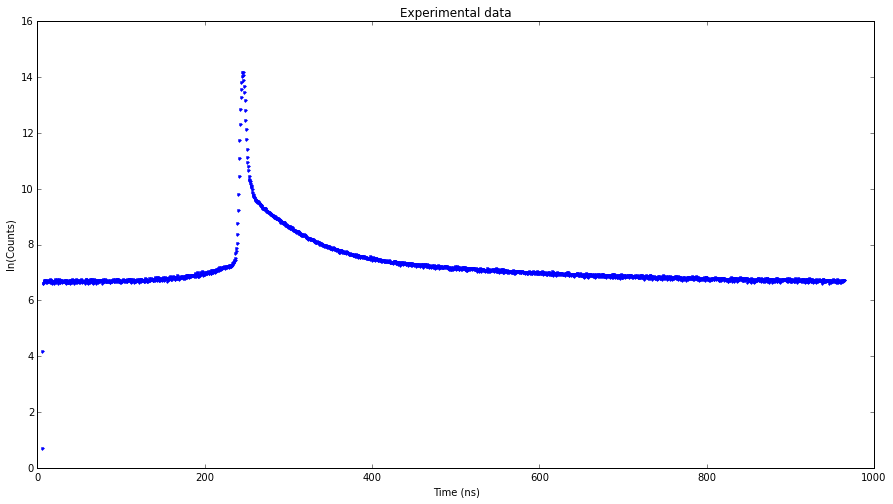

In [3]:
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

ydata = np.loadtxt('N:/Lab 3/Positronium/Lifetime data analysis/161125_lifetime_73-70psi_delay115.0(2.5)ns_range500ns.csv', comments = '#', unpack = True)
xdata = 980*np.arange(0,2048) / 2048.0 # 980 due to TAC range never meeting nominal 1000ns range

index = [item for item in range(len(ydata)) if ydata[item] == 0]
ydata = [i for j, i in enumerate(ydata) if j not in index]
xdata = [i for j, i in enumerate(xdata) if j not in index]

print(np.max(ydata))

ln_ydata = np.log(ydata)

plt.plot(xdata,ln_ydata,'b.')
plt.title('Experimental data')
plt.xlabel('Time (ns)')
plt.ylabel('ln(Counts)')
#plt.xlim(100, 1000)
#plt.ylim(1000, 10000000)

xdata = np.array(xdata)
print(xdata)

ydata = np.array(ln_ydata)
print(ln_ydata)

2939240.0
[   2    3    6 ..., 2013 2014 2015]
[ 0.69314718  0.          6.25958146 ...,  7.3258075   7.30047281
  7.28138566]


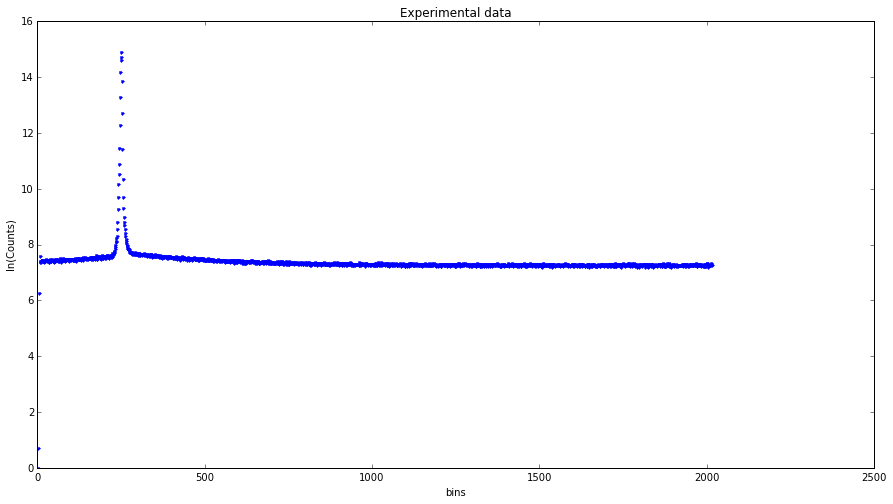

In [98]:
plt.figure(num=None, figsize=(15, 8), dpi=80, facecolor='w', edgecolor='k')

ydata = np.loadtxt('N:/Lab 3/Positronium/Lifetime data analysis/161021_lifetime_14psi_delay_115(2.5)ns.csv', comments = '#', unpack = True)
xdata = np.arange(0,2048)

index = [item for item in range(len(ydata)) if ydata[item] == 0]
ydata = [i for j, i in enumerate(ydata) if j not in index]
xdata = [i for j, i in enumerate(xdata) if j not in index]

print(np.max(ydata))

ln_ydata = np.log(ydata)

plt.plot(xdata,ln_ydata,'b.')
plt.title('Experimental data')
plt.xlabel('bins')
plt.ylabel('ln(Counts)')
#plt.xlim(100, 1000)
#plt.ylim(1000, 10000000)

xdata = np.array(xdata)
print(xdata)

ydata = np.array(ln_ydata)
print(ln_ydata)

In [93]:
xdata2 = (np.where(xdata>1000)) # finds where xdata is greater than 500ns
xdata3 = [x for xs in xdata2 for x in xs] # list comprehension to turn tuple to array
xdata_index = xdata3[0] # finds first xdata index where xdata exceeds 500ns

xdata_index

997

In [94]:
y_bg = ydata[xdata_index:] # finds array of background counts
y_bg_mean = np.mean(y_bg) # performs mean of background counts

print(y_bg_mean)

7.27957749381


[ -6.58643031e+00  -7.27957749e+00  -1.01999603e+00 ...,   4.62300088e-02
   2.08953205e-02   1.80816976e-03]


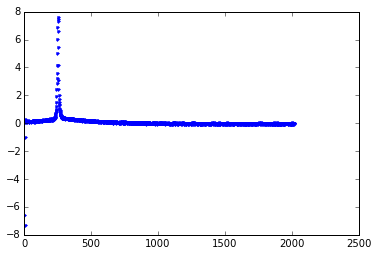

In [95]:
ln_ydata_sub = ydata - y_bg_mean

print(ln_ydata_sub)
plt.plot(xdata,ln_ydata_sub,'b.')

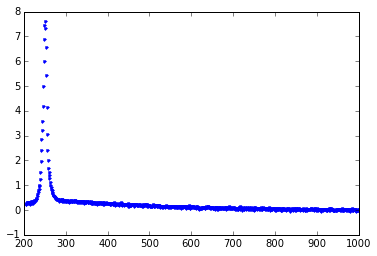

In [96]:
plt.plot(xdata[200:xdata_index],ln_ydata_sub[200:xdata_index],'b.')

In [ ]:
x =
m =
c =

guess = [x,m,c]

def line(x,m,c):
    '''Definition of straight line with slope m'''
    y = m*x + c
    return y



In [ ]:
popt, pcov = curve_fit(line, xdata_cut, ydata_cut, p0 = guess)
print popt
print 'Positron lifetime', 1 / popt[1], 'ns'
print 'Positronium lifetime', 1 / popt[2], 'ns'

# ref: http://journals.aps.org/pr/pdf/10.1103/PhysRev.140.A8
# using 4.5 -+ 1.5 per microsecond per atm for positron's decay constant
# and intrinsic decay constant plus (0.27 per microsecond per atmosphere) for positronium decay constant
# Positron lifetime : 222ns
# Positronium lifetime : 137ns

y = Positronium(xdata_cut,popt[0],popt[1],popt[2],popt[3],popt[4],popt[5], popt[6])

